Un network è una struttura matematica utilizzata per descrivere sistemi formati da elementi collegati tra loro ed è uno strumento fondamentale per lo studio dei sistemi complessi.

Un network è composto da **nodi** e **link**.

I nodi rappresentano gli elementi del sistema, mentre i link rappresentano le relazioni tra questi elementi.

Nel nostro esempio i nodi rappresentano persone e i link rappresentano relazioni di amicizia, quindi stiamo costruendo una rete sociale.




---

La stessa struttura può descrivere sistemi molto diversi.


Nei **social network** nodo → persona e link → interazione.

Nelle **reti di trasporto** nodo → aeroporto o stazione e link → collegamento diretto.

In **Internet** nodo → pagina web e link → collegamento ipertestuale.

In **biologia** nodo → neurone o proteina e link → interazione o sinapsi.

---

Cambia il significato dei nodi, ma la struttura del network rimane la stessa.




##Rete di Amicizie

Iniziamo importando le librerie necessarie. NetworkX viene usata per creare e analizzare il network, mentre Matplotlib serve per visualizzare graficamente la rete e i risultati delle analisi.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

Creiamo poi un grafo vuoto non orientato. Un grafo non orientato è una rete in cui i collegamenti non hanno direzione, quindi l’amicizia tra due persone è reciproca (per esempio come accade in Facebook. Su instagram, invece, il link può essere monodirezionale).

In [ ]:
# Create graph
G = nx.Graph()

Aggiungiamo i nodi del network. Ogni nodo rappresenta una persona all’interno della rete di amicizie. In questa fase stiamo solo definendo chi fa parte del sistema, senza specificare ancora le relazioni.

In [ ]:
G.add_nodes_from(["Alice", "Bob", "Carla", "David", "Emma", "Luca", "Paolo", "Luigi"])

Successivamente aggiungiamo i link, cioè le relazioni di amicizia tra le persone. Ogni coppia indica che esiste un legame diretto tra due nodi. In questo modo stiamo definendo la struttura della rete.

In [ ]:
G.add_edges_from([
    ("Alice", "Bob"),
    ("Alice", "Carla"),
    ("Bob", "David"),
    ("Carla", "David"),
    ("David", "Emma"),
    ("Luca", "Bob"),
    ("Luca", "David"),
    ("Luca", "Paolo"),
    ("Luca", "Luigi")
])

Calcoliamo ora la posizione dei nodi nello spazio usando un spring layout. Questo algoritmo posiziona i nodi simulando molle tra di essi, in modo che nodi più connessi tendano a stare più vicini.

In [ ]:
pos = nx.spring_layout(G, seed=42)  # or nx.kamada_kawai_layout(G)

Creiamo la prima visualizzazione del network. Impostiamo la dimensione della figura e disegniamo separatamente nodi, archi ed etichette per avere un controllo maggiore sull’aspetto grafico.

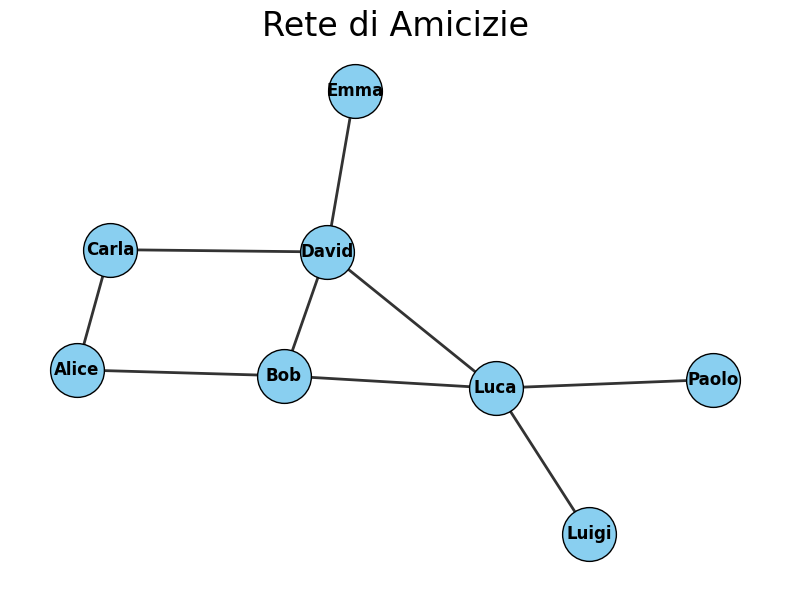

In [ ]:
# Plot
plt.figure(figsize=(8, 6))

#I nodi vengono disegnati come cerchi, tutti con la stessa dimensione e colore.
#In questa prima visualizzazione ogni nodo è trattato allo stesso modo, senza ancora usare informazioni sul grado.

nx.draw_networkx_nodes(
    G, pos,
    node_size=1500,
    node_color="#89CFF0",
    edgecolors="black"
)

#Disegniamo poi gli archi, cioè le amicizie, come linee che collegano i nodi.

nx.draw_networkx_edges(
    G, pos,
    width=2,
    alpha=0.8
)

#Aggiungiamo le etichette dei nodi, che permettono di identificare le persone nella rete.

nx.draw_networkx_labels(
    G, pos,
    font_size=12,
    font_weight="bold"
)

plt.title("Rete di Amicizie", fontsize=24)
plt.axis("off")
plt.tight_layout()
plt.show()


Una quantità fondamentale per analizzare un network è il grado di un nodo. Il grado è il numero di link collegati a un nodo e nel nostro esempio rappresenta il numero di amici di una persona. Nodi con grado alto sono più connessi, mentre nodi con grado basso sono più periferici nella rete.



Calcoliamo il grado di ogni nodo, cioè il numero di amicizie di ciascuna persona. Il risultato è un dizionario che associa a ogni nodo il suo grado.

In [ ]:
degree_dict = dict(G.degree())
degree_dict

{'Alice': 2,
 'Bob': 3,
 'Carla': 2,
 'David': 4,
 'Emma': 1,
 'Luca': 4,
 'Paolo': 1,
 'Luigi': 1}

Disegniamo nuovamente il network, questa volta facendo dipendere dimensione e colore dei nodi dal grado. In questo modo diventa immediatamente visibile chi è più connesso all’interno della rete.

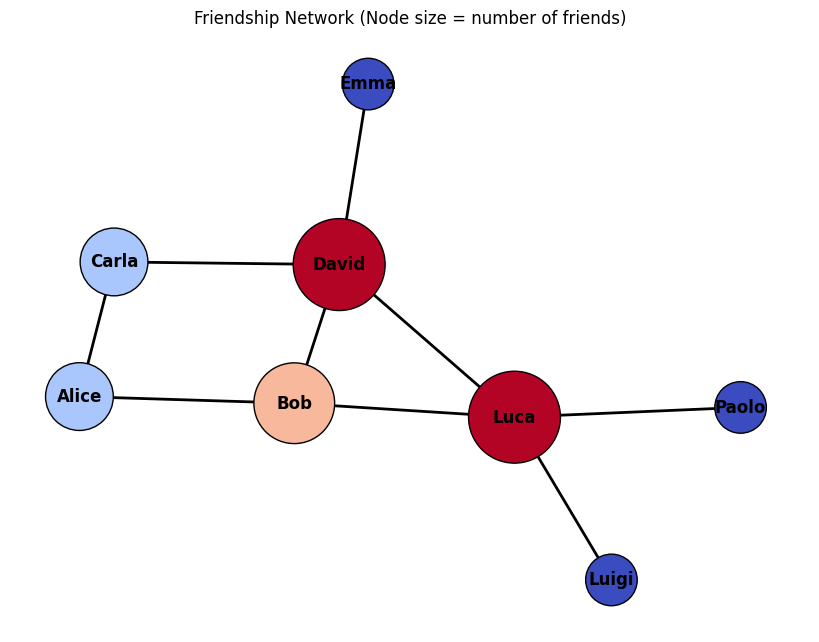

In [ ]:
degrees = dict(G.degree())
node_sizes = [380 + 1000 * degrees[n] for n in G.nodes()]

plt.figure(figsize=(8, 6))

nx.draw(
    G, pos,
    with_labels=True,
    node_size=node_sizes,
    node_color=list(degrees.values()),
    cmap=plt.cm.coolwarm,
    edgecolors="black",
    width=2,
    font_weight="bold"
)

plt.title("Friendship Network (Node size = number of friends)")
plt.axis("off")
plt.show()



Infine analizziamo la distribuzione dei gradi, che indica quanti nodi hanno un certo grado. Questo grafico fornisce informazioni sulla struttura globale della rete e permette di capire se la rete è uniforme oppure se esistono nodi molto più connessi degli altri.

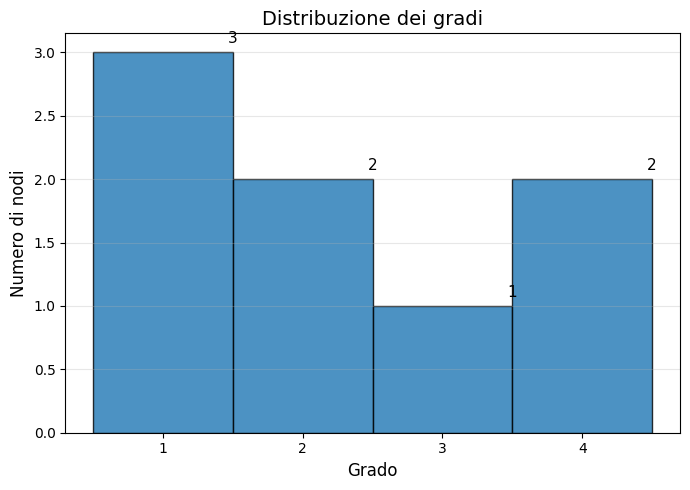

In [ ]:
import matplotlib.pyplot as plt

degrees = list(degree_dict.values())

plt.figure(figsize=(7, 5))

# Impostiamo i bin dell’istogramma in modo che ogni barra corrisponda a un valore intero del grado.
bins = range(min(degrees), max(degrees) + 2)

#Disegniamo l’istogramma e aggiungiamo etichette e titolo per rendere il grafico leggibile.

counts, bins, patches = plt.hist(
    degrees,
    bins=bins,
    align="left",
    edgecolor="black",
    alpha=0.8
)

plt.xticks(range(min(degrees), max(degrees) + 1))
plt.xlabel("Grado", fontsize=12)
plt.ylabel("Numero di nodi", fontsize=12)
plt.title("Distribuzione dei gradi", fontsize=14)

# Scriviamo sopra ogni barra il numero di nodi con quel grado, per rendere il grafico ancora più chiaro.
for count, x in zip(counts, bins):
    if count > 0:
        plt.text(x + 0.5, count + 0.05, int(count), ha="center", va="bottom", fontsize=11)

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


##Karate Club

In questa seconda attività introduciamo un network “classico” della network science: il Karate Club Network di Wayne W. Zachary. È un dataset reale (anni ’70) che descrive le relazioni sociali tra i membri di un club di karate. Durante l’osservazione, nel club nasce un conflitto tra due figure centrali e il gruppo si divide in due fazioni. La cosa interessante è che la rete contiene già molte informazioni sulla struttura sociale e sulle “comunità” che emergeranno.

Con nx.karate_club_graph() carichiamo direttamente il Karate Club Network, un grafo non orientato in cui i nodi sono i membri del club e i link rappresentano relazioni sociali osservate. I nodi non hanno nomi “umani”: sono numerati (0, 1, 2, …), perché il dataset è un modello astratto di una rete reale.

In [ ]:
G = nx.karate_club_graph()
print(G.number_of_nodes(), G.number_of_edges())

34 78


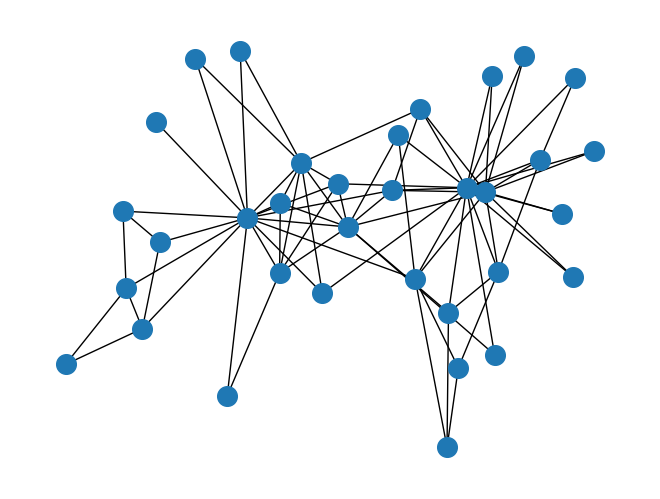

In [ ]:
pos = nx.spring_layout(G, seed=7)
nx.draw(G, pos, node_size=200, with_labels=False)
plt.show()

In [ ]:
deg = dict(G.degree())
top_deg = sorted(deg.items(), key=lambda x: x[1], reverse=True)[:5]
top_deg


[(33, 17), (0, 16), (32, 12), (2, 10), (1, 9)]

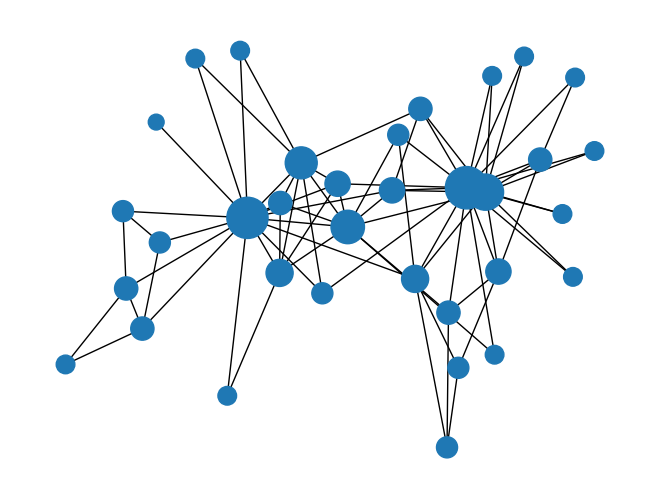

In [ ]:
sizes = [80 + 50*deg[n] for n in G.nodes()]
nx.draw(G, pos, node_size=sizes, with_labels=False)
plt.show()


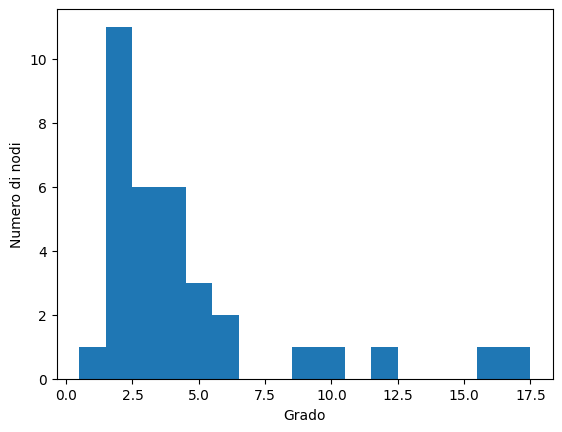

In [ ]:
degrees = list(deg.values())
plt.hist(degrees, bins=range(min(degrees), max(degrees)+2), align="left")
plt.xlabel("Grado")
plt.ylabel("Numero di nodi")
plt.show()

In questa parte del codice utilizziamo un algoritmo di community detection, cioè un metodo che serve a individuare automaticamente dei gruppi di nodi più densamente connessi tra loro rispetto al resto della rete. L’idea è che una comunità rappresenti un gruppo sociale, una fazione o un sottogruppo coerente all’interno del network.
Non entreremo nel dettaglio nei metodi, ma la ricerca di comunità in un network diventa molto importante per studiare i dati.

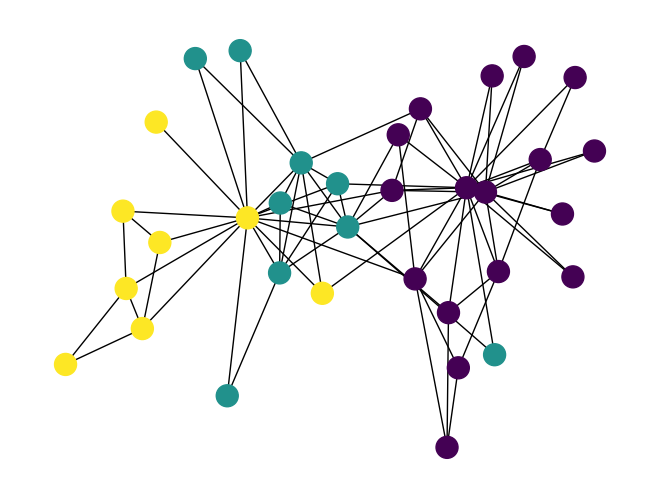

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities

communities = list(greedy_modularity_communities(G))
len(communities), [len(c) for c in communities]

import itertools

color_map = {}
for i, com in enumerate(communities):
    for n in com:
        color_map[n] = i

colors = [color_map[n] for n in G.nodes()]
nx.draw(G, pos, node_color=colors, node_size=250, with_labels=False)
plt.show()

##Florentine Families

Ora analizziamo il **Florentine Families Network**, un dataset storico che descrive le relazioni tra alcune delle principali famiglie aristocratiche di Firenze nel XV secolo. I nodi del network rappresentano le famiglie, mentre i link rappresentano legami sociali ed economici, in particolare alleanze e matrimoni. Questo network è spesso utilizzato come esempio perché, pur essendo piccolo, mostra in modo molto chiaro come la struttura delle relazioni possa riflettere rapporti di potere reali.

Un primo modo per misurare l’importanza di un nodo in un network, come abbiamo visto prima, è il **grado**, cioè il numero di link che collegano quel nodo agli altri. Nel contesto delle famiglie fiorentine, il grado rappresenta quante alleanze dirette ha una famiglia. Tuttavia, **il grado non è sempre sufficiente per descrivere il ruolo di un nodo all’interno della rete**.

Infatti, **una famiglia può avere poche alleanze dirette ma occupare una posizione strategica se si trova lungo i percorsi che collegano gruppi diversi della rete**. Per descrivere questo tipo di importanza introduciamo il concetto di centralità. La **centralità** misura quanto un nodo è centrale dal punto di vista strutturale, cioè quanto è importante per il funzionamento complessivo della rete.

In particolare, la **betweenness centrality** misura **quante volte un nodo si trova lungo i cammini minimi che collegano altre coppie di nodi**. Un nodo con alta betweenness agisce come un intermediario o un ponte tra parti diverse del network. Nel caso del Florentine Families Network, una famiglia con alta betweenness è in grado di controllare o facilitare i flussi di informazioni, risorse e alleanze tra gruppi diversi.

15 20


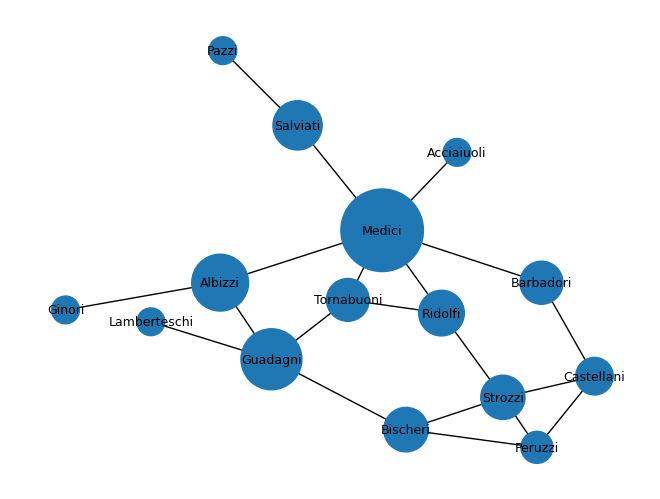

[('Medici', 0.521978021978022),
 ('Guadagni', 0.2545787545787546),
 ('Albizzi', 0.21245421245421245),
 ('Salviati', 0.14285714285714288),
 ('Ridolfi', 0.11355311355311355)]

In [ ]:
H = nx.florentine_families_graph()
print(H.number_of_nodes(), H.number_of_edges())
posH = nx.spring_layout(H, seed=3)

btwH = nx.betweenness_centrality(H)
sizesH = [400 + 6000*btwH[n] for n in H.nodes()]

nx.draw(H, posH, with_labels=True, node_size=sizesH, font_size=9)
plt.show()

sorted(btwH.items(), key=lambda x: x[1], reverse=True)[:5]


##Tipi di Network

Confrontiamo ora quattro modelli di network che vengono usati nella network science per descrivere e comprendere sistemi reali molto diversi. L’obiettivo non è solo visualizzare reti diverse, ma capire come vengono costruite e che tipo di fenomeni reali rappresentano.

Il primo modello è il **lattice 1D** (reticolo unidimensionale). In questo network i nodi sono disposti in cerchio e ogni nodo è collegato ai suoi vicini più prossimi. In questo caso non c’è alcuna casualità: la rete è completamente regolare e tutti i nodi hanno lo stesso grado. Questo tipo di struttura rappresenta sistemi molto ordinati e locali, come **persone sedute in cerchio che parlano solo con i vicini**, oppure modelli fisici semplici come catene di atomi o oscillatori accoppiati.

Il secondo modello è il lattice 2D (reticolo bidimensionale). Qui i nodi sono disposti su una griglia e ogni nodo è collegato ai suoi vicini spaziali. Nel codice utilizziamo una griglia quadrata di lato L. Questo tipo di network è tipico di sistemi che vivono nello spazio fisico, come le **celle di un materiale solido**, le intersezioni di una città a griglia o i modelli di diffusione su superfici. Anche in questo caso la struttura è molto regolare e le distanze tra nodi crescono lentamente, rendendo i cammini medi piuttosto lunghi.

Il terzo modello è il small-world network, introdotto da Watts e Strogatz. Questo network nasce partendo da un reticolo regolare, a cui vengono aggiunti pochi collegamenti casuali. Nel codice questo avviene scegliendo una probabilità p diversa da zero per la riconnessione dei link (cioè casualmente un link viene eliminato e ricostruito con un altro nodo). Il risultato è una rete che mantiene un alto clustering locale, come nei reticoli, ma in cui le distanze medie tra nodi diventano molto piccole. Questo è il modello che spiega il fenomeno dei **sei gradi di separazione**. Molti sistemi sociali reali, come **reti di amicizie**, collaborazioni scientifiche o contatti professionali, mostrano una struttura di tipo small-world.

Il quarto modello è il scale-free network, costruito con il modello di Barabási–Albert. In questo caso la rete cresce nel tempo e i **nuovi nodi tendono a collegarsi preferenzialmente a nodi già molto connessi** (per esempio, quando una persona scarica instagram, si connetterà ai suoi amici ma probabilmente anche a nodi grossi, ovvero con tanti follower). Questo meccanismo, chiamato **preferential attachment**, produce una rete in cui pochi nodi diventano hub, mentre la maggior parte dei nodi ha pochi link. Nel codice questo modello è generato specificando quanti link ogni nuovo nodo crea quando entra nella rete. I network scale-free sono molto comuni nel mondo reale: esempi tipici sono** Internet**, i social network e le **reti aeroportuali**, dove pochi **hub** concentrano la maggior parte dei collegamenti.

In tutte le visualizzazioni la dimensione dei nodi dipende dal grado, cioè dal numero di connessioni. Questo rende immediatamente visibile la differenza tra reti regolari, dove i nodi sono simili tra loro, e reti eterogenee, come quelle scale-free, dove emergono chiaramente degli hub. Confrontando questi quattro modelli possiamo capire come la struttura di un network influenzi fenomeni come la diffusione di informazioni, la robustezza ai guasti o il ruolo dei nodi centrali.

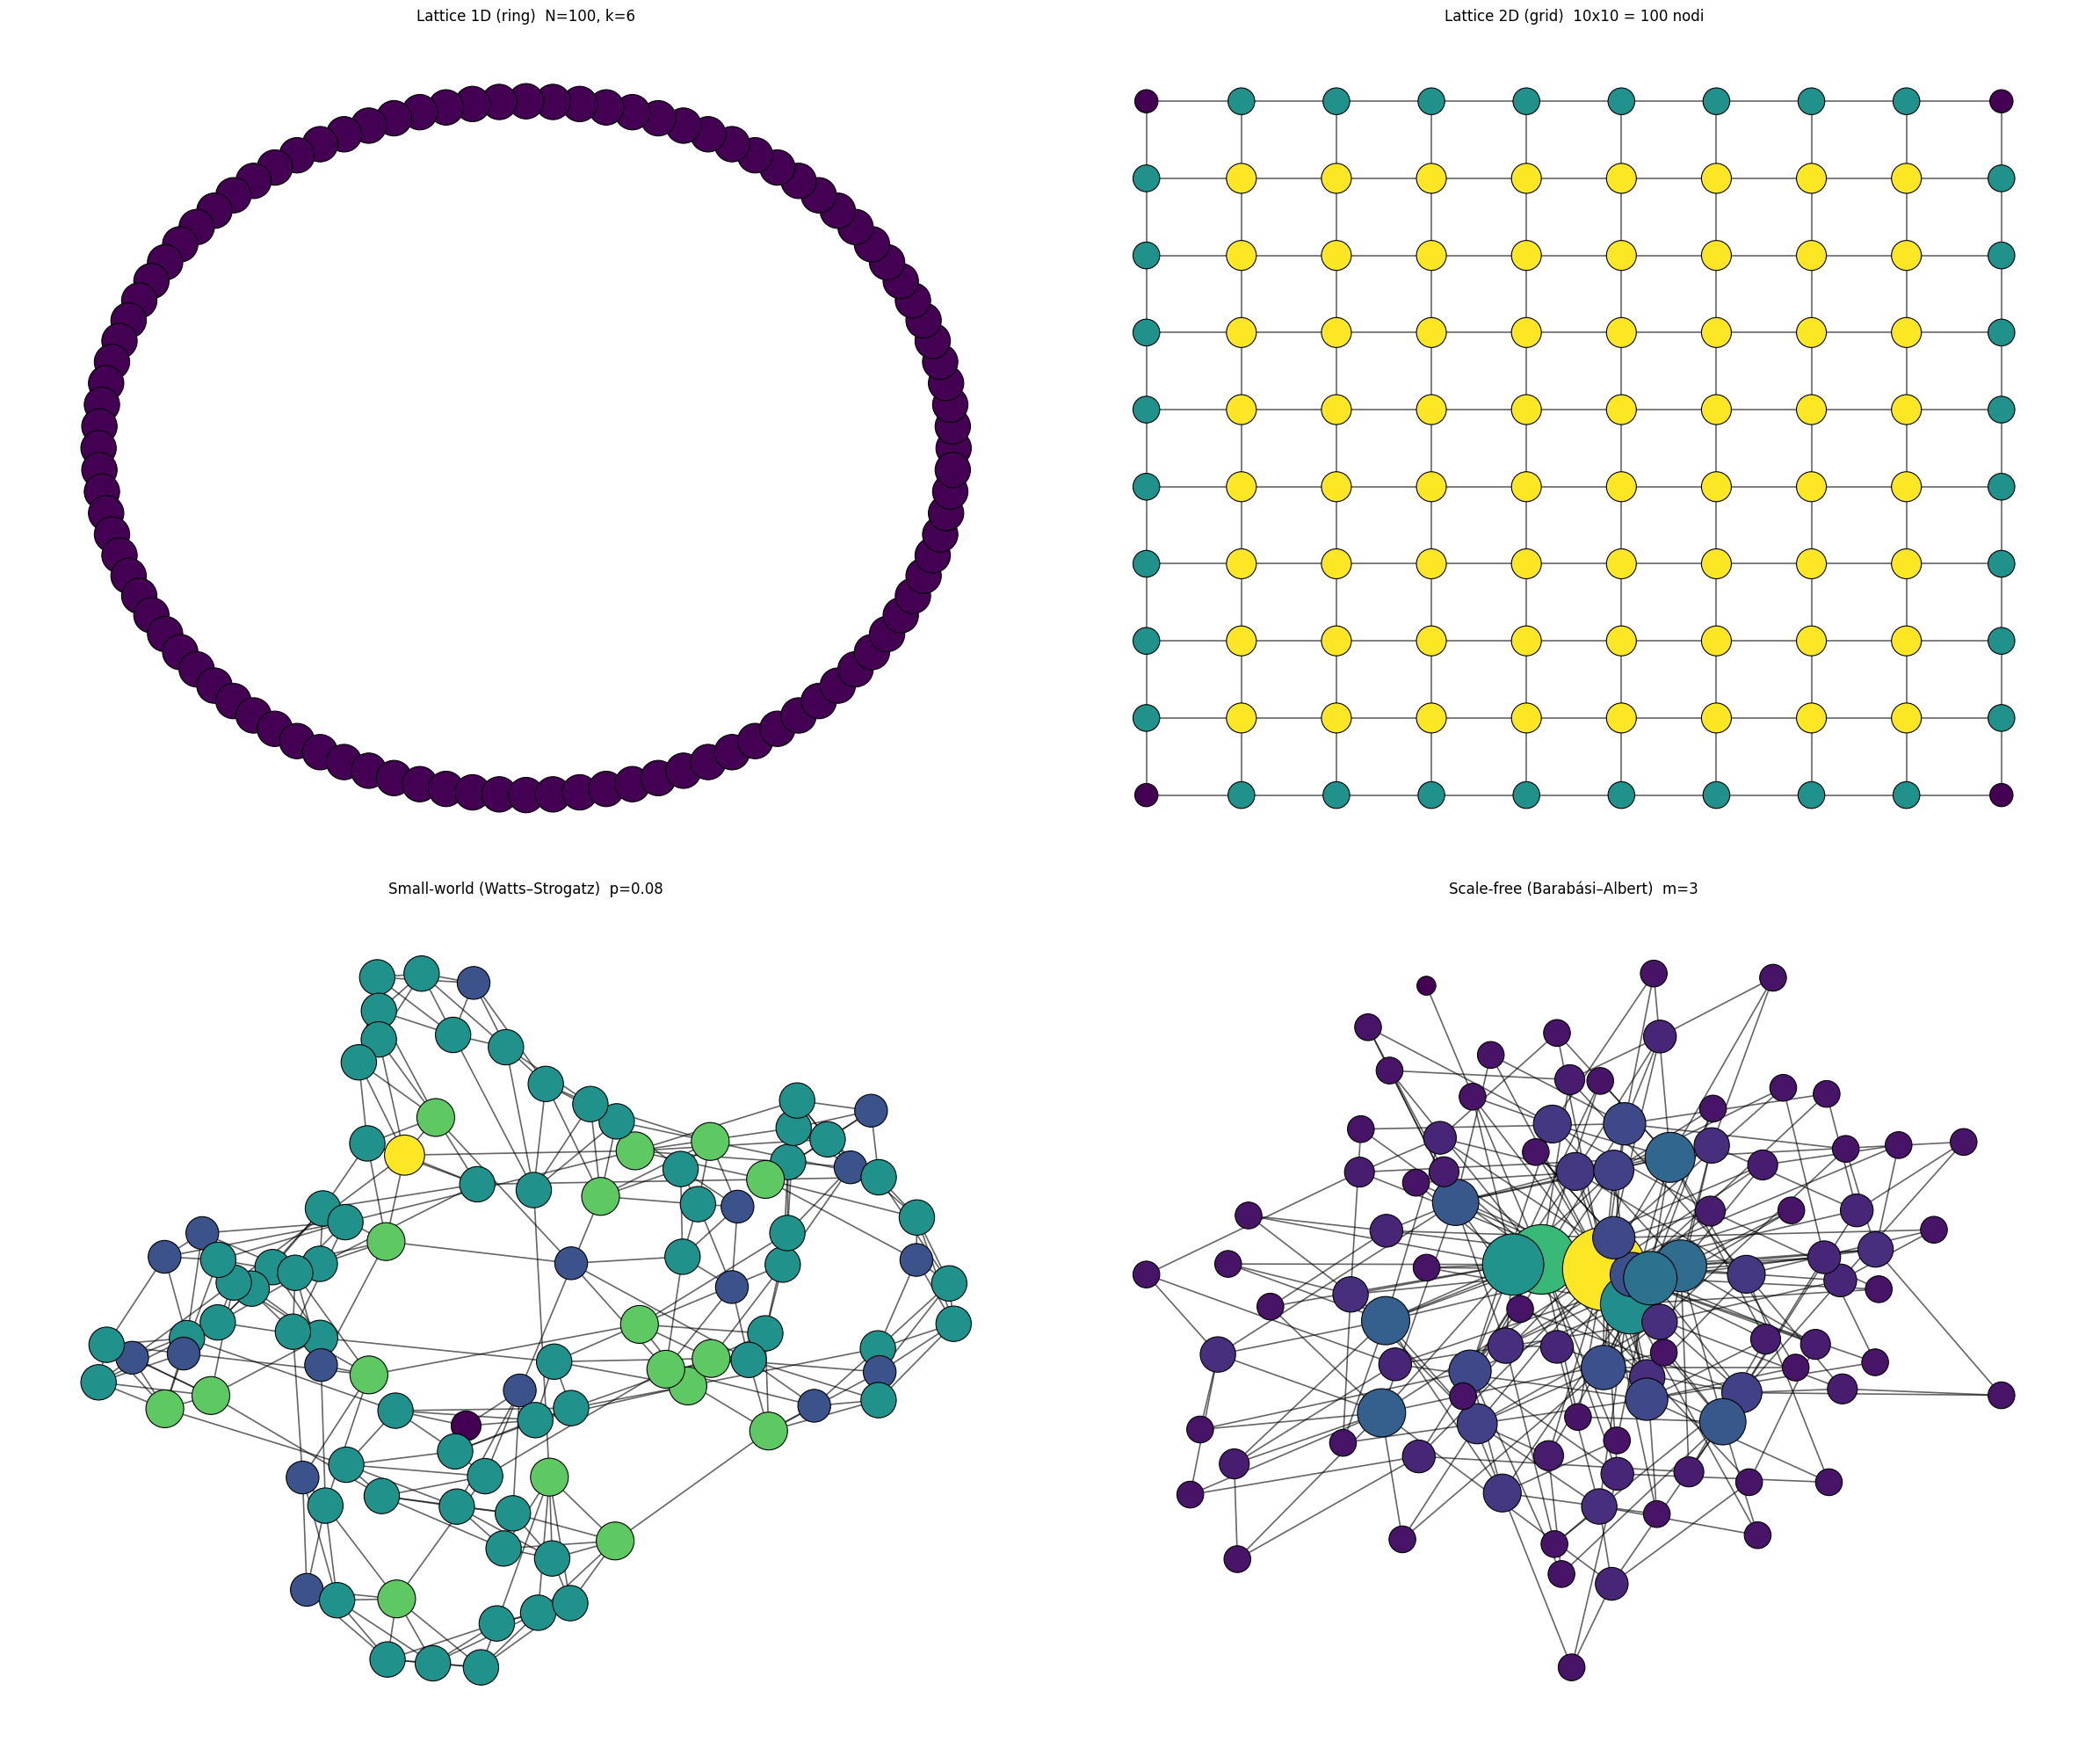

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def node_sizes_by_degree(G, base=120, scale=120):
    deg = dict(G.degree())
    sizes = [base + scale * deg[n] for n in G.nodes()]
    colors = [deg[n] for n in G.nodes()]  # color = degree
    return sizes, colors

def draw(ax, G, pos, title):
    sizes, colors = node_sizes_by_degree(G)
    ax.set_title(title, fontsize=12)

    nx.draw_networkx_edges(G, pos, ax=ax, width=1.2, alpha=0.6)
    nx.draw_networkx_nodes(
        G, pos, ax=ax,
        node_size=sizes,
        node_color=colors,
        cmap=plt.cm.viridis,
        edgecolors="black",
        linewidths=0.8
    )
    ax.axis("off")

# -----------------------
# Parametri (modifica qui)
# -----------------------
N = 100          # nodi per ring/small-world/scale-free
k = 6            # vicini nel ring lattice (deve essere pari)
p = 0.08         # rewiring small-world
m_attach = 3     # attacchi BA

L = 10           # lato griglia 2D (LxL nodi)

# -----------------------
# 1) Lattice 1D (ring)
# -----------------------
G_ring = nx.watts_strogatz_graph(N, k, 0)   # p=0 => lattice regolare
pos_ring = nx.circular_layout(G_ring)

# -----------------------
# 2) Lattice 2D (grid)
# -----------------------
G_grid = nx.grid_2d_graph(L, L)  # nodi = coppie (i,j)
pos_grid = { (i, j): (j, -i) for i, j in G_grid.nodes() }  # layout "a griglia"

# -----------------------
# 3) Small-world (WS)
# -----------------------
G_sw = nx.watts_strogatz_graph(N, k, p)
pos_sw = nx.spring_layout(G_sw, seed=2)

# -----------------------
# 4) Scale-free (BA)
# -----------------------
G_sf = nx.barabasi_albert_graph(N, m_attach)
pos_sf = nx.spring_layout(G_sf, seed=3)

# -----------------------
# Plot
# -----------------------
fig, axes = plt.subplots(2, 2, figsize=(24, 20))

draw(axes[0, 0], G_ring, pos_ring, f"Lattice 1D (ring)  N={N}, k={k}")
draw(axes[0, 1], G_grid, pos_grid, f"Lattice 2D (grid)  {L}x{L} = {L*L} nodi")
draw(axes[1, 0], G_sw, pos_sw, f"Small-world (Watts–Strogatz)  p={p}")
draw(axes[1, 1], G_sf, pos_sf, f"Scale-free (Barabási–Albert)  m={m_attach}")

plt.tight_layout()
plt.show()


##Pokemon Network

Anche da un dataset apparentemente semplice e legato al mondo dell’intrattenimento, come quello dei Pokémon, è possibile estrarre informazioni interessanti e fare analisi significative. I Pokémon non sono solo personaggi di un videogioco o di una serie animata, ma possono essere descritti come un insieme di dati strutturati: ogni Pokémon ha attributi ben definiti, come il tipo, la generazione di appartenenza e alcune caratteristiche speciali.

Iniziamo caricando il dataset dei Pokémon utilizzando la libreria pandas. Il file viene scaricato direttamente da Internet in formato CSV e letto in un DataFrame chiamato df. Questo DataFrame può essere pensato come una tabella simile a un foglio Excel, in cui ogni riga rappresenta un Pokémon e ogni colonna una sua caratteristica, come il tipo, la generazione o il fatto di essere leggendario. Stampando le prime righe con head() possiamo controllare rapidamente che il caricamento sia avvenuto correttamente e osservare la struttura del dataset.

In [1]:
import pandas as pd # Importiamo il pacchetto


# Scarica il dataset direttamente da Internet
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
df = pd.read_csv(url)  #Abbiamo definito con df il nostro file excel , e lo leggiamo con la funzione read_csv (Comma-separated values) del pacchetto pandas (pd)

# Visualizza le prime righe del dataset
print(df.head())

   #                   Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0  1              Bulbasaur  Grass  Poison  45      49       49       65   
1  2                Ivysaur  Grass  Poison  60      62       63       80   
2  3               Venusaur  Grass  Poison  80      82       83      100   
3  3  VenusaurMega Venusaur  Grass  Poison  80     100      123      122   
4  4             Charmander   Fire     NaN  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1      False  
2      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False  


Successivamente utilizziamo il dataset per costruire una rete bipartita Pokémon–Tipi. Per rendere la visualizzazione leggibile, limitiamo l’analisi alla prima generazione, che contiene 151 Pokémon. In questo modo evitiamo di creare un grafo troppo grande e difficile da interpretare.

In [2]:
# Per non fare un grafo ingestibile: usa Gen 1
df = df[df["Generation"] == 1].copy()

Costruiamo il network usando NetworkX. Creiamo un grafo vuoto e aggiungiamo due tipi diversi di nodi: i Pokémon e i tipi. Ogni Pokémon viene collegato al suo Type 1 e, se presente, anche al Type 2. Questo significa che non esistono collegamenti diretti tra Pokémon o tra tipi, ma solo collegamenti tra Pokémon e tipi. La rete risultante è quindi un classico esempio di network bipartito.

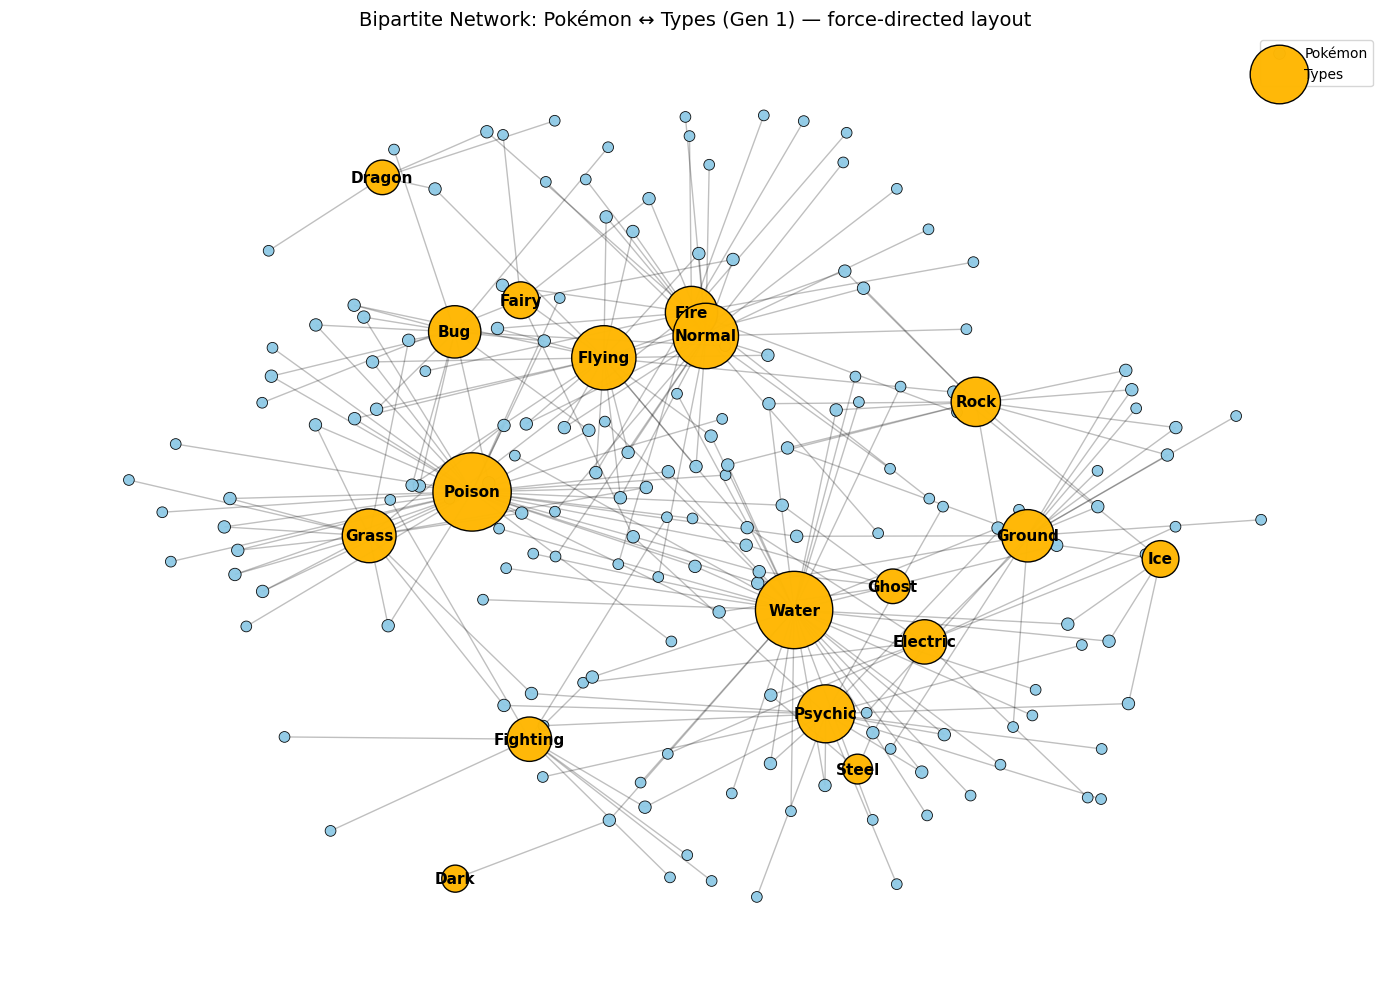

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# -----------------------------
# 2) Build bipartite graph: Pokemon <-> Types
# -----------------------------
B = nx.Graph()

pokemon_nodes = df["Name"].tolist()

# Prende tutti i tipi presenti (Type 1 e Type 2)
type_nodes = pd.unique(df[["Type 1", "Type 2"]].values.ravel("K"))
type_nodes = [t for t in type_nodes if pd.notna(t)]

B.add_nodes_from(pokemon_nodes, bipartite=0, kind="pokemon")
B.add_nodes_from(type_nodes, bipartite=1, kind="type")

for _, row in df.iterrows():
    p = row["Name"]
    t1 = row["Type 1"]
    t2 = row["Type 2"]
    B.add_edge(p, t1)
    if pd.notna(t2):
        B.add_edge(p, t2)

# -----------------------------
# 3) Layout "misto" (NON due colonne)
#    Spring layout = force-directed
# -----------------------------
pos = nx.spring_layout(B, seed=7, k=0.35)  # k controlla "spaziatura"

# -----------------------------
# 4) Node styling: size by degree, color by bipartite set
# -----------------------------
deg = dict(B.degree())

# separa nodi
pokemons = [n for n, d in B.nodes(data=True) if d.get("kind") == "pokemon"]
types = [n for n, d in B.nodes(data=True) if d.get("kind") == "type"]

# dimensioni: i tipi hanno degree alto, quindi diventano automaticamente più grandi
pokemon_sizes = [40 + 20 * deg[n] for n in pokemons]
type_sizes    = [300 + 80 * deg[n] for n in types]

plt.figure(figsize=(14, 10))

# edges
nx.draw_networkx_edges(B, pos, alpha=0.25, width=1.0)

# pokemon nodes
nx.draw_networkx_nodes(
    B, pos,
    nodelist=pokemons,
    node_size=pokemon_sizes,
    node_color="#8ecae6",
    edgecolors="black",
    linewidths=0.6,
    alpha=0.95,
    label="Pokémon"
)

# type nodes
nx.draw_networkx_nodes(
    B, pos,
    nodelist=types,
    node_size=type_sizes,
    node_color="#ffb703",
    edgecolors="black",
    linewidths=1.0,
    alpha=0.98,
    label="Types"
)

# -----------------------------
# 5) Labels: consigliato SOLO per i tipi (molto più leggibile)
# -----------------------------
nx.draw_networkx_labels(
    B, pos,
    labels={t: t for t in types},
    font_size=11,
    font_weight="bold"
)

plt.title("Bipartite Network: Pokémon ↔ Types (Gen 1) — force-directed layout", fontsize=14)
plt.axis("off")
plt.legend(scatterpoints=1)
plt.tight_layout()
plt.show()


Dopo la visualizzazione del network passiamo a un’analisi statistica più classica del dataset. Calcoliamo il numero di Pokémon per tipo primario (Type 1) usando value_counts() e rappresentiamo il risultato con un grafico a barre. Questo grafico ci permette di capire quali tipi sono più comuni nella prima generazione e quali sono più rari.

In [ ]:
import matplotlib.pyplot as plt

# Conta i tipi di Pokémon di 'Type 1'
tipo_pokemon = df['Type 1'].value_counts()

# Crea un grafico a barre
plt.figure(figsize=(10,6))
tipo_pokemon.plot(kind='bar', color='skyblue')
plt.title('Numero di Pokémon per Tipo Primario')
plt.xlabel('Tipo')
plt.ylabel('Conteggio')
plt.xticks(rotation=45)
plt.show()

Successivamente torniamo al dataset completo e analizziamo i Pokémon leggendari. Filtriamo il DataFrame selezionando solo le righe in cui la colonna Legendary è vera. Stampando alcune righe possiamo osservare quali Pokémon sono classificati come leggendari e in quale generazione compaiono.



In [ ]:
# Scarica il dataset direttamente da Internet
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
df = pd.read_csv(url)  #Abbiamo definito con df il nostro file excel , e lo leggiamo con la funzione read_csv (Comma-separated values) del pacchetto pandas (pd)

# Visualizza le prime righe del dataset
print(df.head())

In [ ]:
# Seleziona solo i Pokémon leggendari
leggendari = df[df['Legendary'] == True]
print(leggendari[['Name', 'Type 1', 'Generation', 'Legendary']].head(30))

Analizziamo poi la distribuzione dei Pokémon per generazione, contando quanti Pokémon appartengono a ciascuna generazione. Rappresentiamo questa informazione con un grafico a torta, che mostra in modo intuitivo la percentuale di Pokémon introdotti in ogni generazione.


In [ ]:
# Conta i Pokémon per generazione
conteggio_generazione = df['Generation'].value_counts()
print(conteggio_generazione)

# Crea un grafico a torta
plt.figure(figsize=(8,6))
plt.pie(conteggio_generazione, labels=conteggio_generazione.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuzione dei Pokémon per Generazione')
plt.show()



Infine, ci concentriamo di nuovo sui Pokémon leggendari e studiamo come sono distribuiti nelle varie generazioni. Calcoliamo quanti Pokémon leggendari compaiono in ciascuna generazione e rappresentiamo il risultato con un grafico a barre. Questo ci permette di confrontare le generazioni tra loro e osservare se il numero di Pokémon leggendari cresce, diminuisce o rimane stabile nel tempo.

In [ ]:
# Conta i Pokémon leggendari per generazione
leggendari_per_generazione = df[df['Legendary'] == True]['Generation'].value_counts().sort_index()

# Crea un grafico a barre
plt.figure(figsize=(8, 6))
plt.bar(leggendari_per_generazione.index, leggendari_per_generazione.values, color='purple')
plt.xlabel('Generazione')
plt.ylabel('Numero di Pokémon Leggendari')
plt.title('Distribuzione dei Pokémon Leggendari per Generazione')
plt.show()


##Rete bipartita

In questa attività costruiamo e visualizziamo una rete bipartita, cioè un network in cui i nodi possono essere divisi in due insiemi distinti e i collegamenti esistono solo tra nodi di insiemi diversi. Questo tipo di rete è molto comune quando si descrivono relazioni del tipo “chi è interessato a cosa”, “chi partecipa a cosa” o “chi usa cosa”.

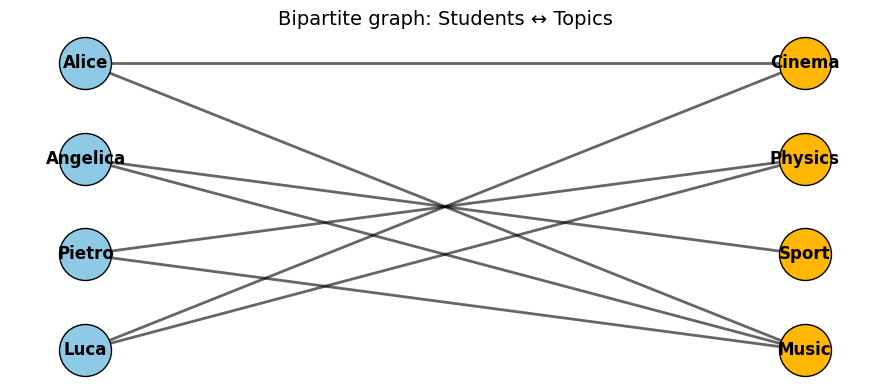

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

B = nx.Graph()

students = ["Luca","Pietro","Angelica","Alice"]
topics   = ["Music","Sport","Physics","Cinema"]

B.add_nodes_from(students, bipartite=0)
B.add_nodes_from(topics,   bipartite=1)

B.add_edges_from([
    ("Pietro","Physics"), ("Pietro","Music"),
    ("Angelica","Sport"), ("Angelica","Music"),
    ("Alice","Cinema"), ("Alice","Music"),
    ("Luca","Physics"), ("Luca","Cinema"),
])

# --- bipartite layout: two vertical columns ---
pos = {}
pos.update({s: (0, i) for i, s in enumerate(students)})
pos.update({t: (1, i) for i, t in enumerate(topics)})

plt.figure(figsize=(9, 4))

# edges first
nx.draw_networkx_edges(B, pos, width=2, alpha=0.6)

# nodes by set
nx.draw_networkx_nodes(B, pos, nodelist=students, node_size=1400,
                       node_color="#8ecae6", edgecolors="black")
nx.draw_networkx_nodes(B, pos, nodelist=topics, node_size=1400,
                       node_color="#ffb703", edgecolors="black")

# labels
nx.draw_networkx_labels(B, pos, font_weight="bold")

plt.title("Bipartite graph: Students ↔ Topics", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()


Qui stiamo facendo il passo più importante dopo una rete bipartita: costruiamo la proiezione su uno dei due insiemi, in questo caso sugli studenti. L’idea è trasformare la rete “studenti–argomenti” in una rete in cui compaiono solo studenti, collegati tra loro se condividono almeno un argomento. In questo modo passiamo da una rete che descrive “chi è interessato a cosa” a una rete che descrive “chi è simile a chi” (in base agli interessi).

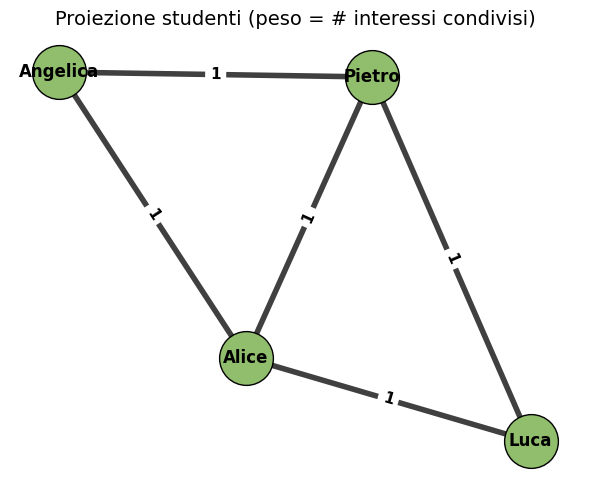

In [ ]:
#La riga seguente crea la proiezione pesata sugli studenti. weighted_projected_graph(B, students)
#costruisce un nuovo grafo in cui i nodi sono gli studenti e inserisce un arco tra due studenti
#se hanno almeno un vicino in comune nel grafo bipartito, cioè se condividono almeno un argomento.
#Il peso dell’arco, salvato nell’attributo "weight", indica quanti argomenti i due studenti hanno in comune.

students_proj = bipartite.weighted_projected_graph(B, students)

pos2 = nx.spring_layout(students_proj, seed=2)

#A questo punto estraiamo i pesi degli archi. Ogni arco nel grafo proiettato ha un attributo "weight" che vale tipicamente 1, 2, ecc.,
#a seconda di quanti interessi sono condivisi. Questi pesi verranno usati per rendere la visualizzazione più informativa.

weights = [students_proj[u][v]["weight"] for u, v in students_proj.edges()]
widths  = [1.5 + 2.5*w for w in weights]  # scale thickness

plt.figure(figsize=(6, 5))

nx.draw_networkx_nodes(students_proj, pos2, node_size=1500,
                       node_color="#90be6d", edgecolors="black")
nx.draw_networkx_labels(students_proj, pos2, font_weight="bold")

nx.draw_networkx_edges(students_proj, pos2, width=widths, alpha=0.75)

# edge labels = weights
edge_labels = {(u, v): students_proj[u][v]["weight"] for u, v in students_proj.edges()}
nx.draw_networkx_edge_labels(students_proj, pos2, edge_labels=edge_labels,
                             font_size=11, font_weight="bold")

plt.title("Proiezione studenti (peso = # interessi condivisi)", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()
